In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab
import pandas as pd
import ast
import os
def eval_np_array_literal(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

foo1.checkpoint
foo2.checkpoint
foo3.checkpoint
foo4.checkpoint
foo5.checkpoint
foo6.checkpoint


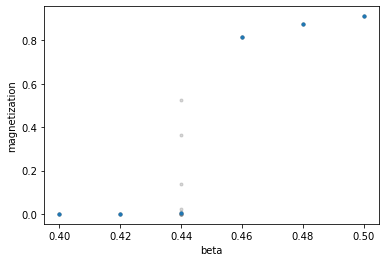

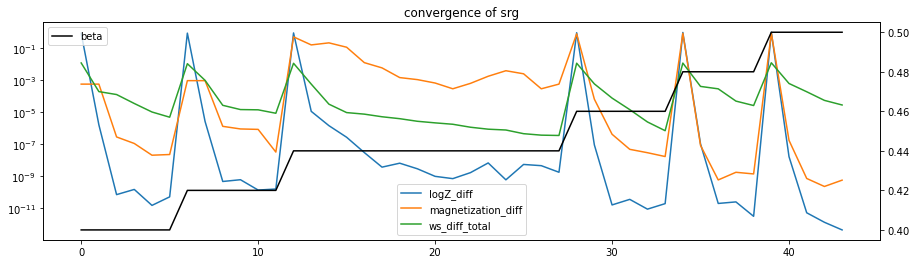

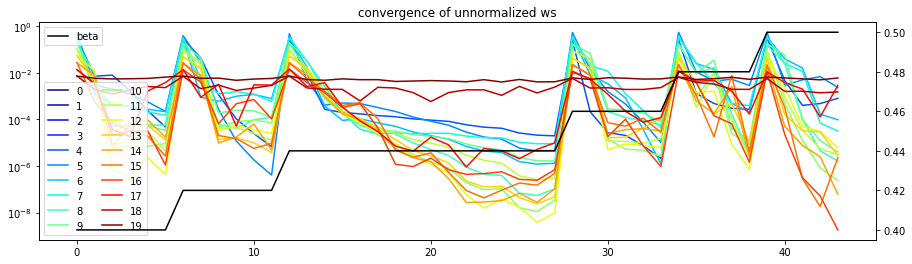

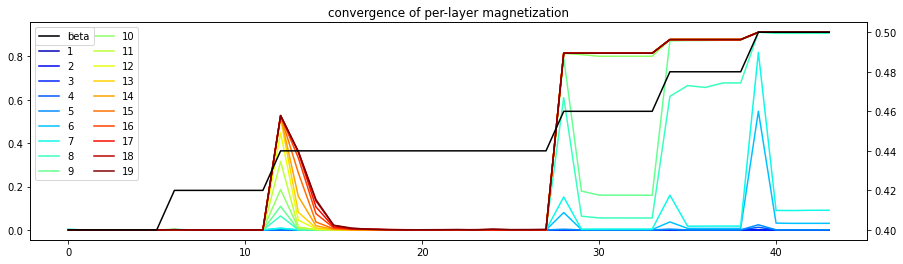

In [41]:

# Get the list of checkpoint files
aList=glob.glob('foo*.checkpoint')
aList.sort()
data=[] #the full training curve of each datapoint
data1=[] #the last training point of each datapoint
for a in aList:
    datapoint_name=a[:-11]
    print(a)
    if os.path.exists(datapoint_name+'.curve.csv'):
        data_point=pd.read_csv(datapoint_name+'.curve.csv',converters={
            'ws_diff': eval_np_array_literal,
            'ws_diff_normalized': eval_np_array_literal,
            'magnetization_per_layer':eval_np_array_literal})
        # eval_np_array_literal is for reading an array from csv
        data.append(data_point)
        data1.append(data_point.iloc[-1])
        
data=pd.concat(data,ignore_index=True)
data1=pd.DataFrame(data1)

a_index='beta'


plt.plot(data[a_index],data['magnetization'],'.',color='grey',alpha=.3)
plt.plot(data1[a_index],data1['magnetization'],'.')
plt.xlabel(a_index)
plt.ylabel('magnetization')
plt.show()

plt.figure(figsize=(15,4))
plt.plot(data['logZ_diff'],label='logZ_diff')
plt.plot(data['magnetization_diff'],label='magnetization_diff')
plt.plot(data['ws_diff_total'],label='ws_diff_total')
plt.yscale('log')
plt.legend()
plt.twinx().plot(data[a_index],label=a_index,color='black')
plt.legend()
plt.title('convergence of srg')
plt.show()

ws_diff=np.stack(data['ws_diff']).T
plt.figure(figsize=(15,4))
colors = matplotlib.pylab.cm.jet(np.linspace(0,1,ws_diff.shape[0]))
for i in range(ws_diff.shape[0]):
    j=i//2
    plt.plot(ws_diff[i]/2**j,label=i,color=colors[i])
plt.yscale('log')
plt.legend(ncol=2)
plt.twinx().plot(data[a_index],label=a_index,color='black')
plt.legend()
plt.title('convergence of unnormalized ws')
plt.show()


ws_diff=np.stack(data['magnetization_per_layer']).T
plt.figure(figsize=(15,4))
colors = matplotlib.pylab.cm.jet(np.linspace(0,1,ws_diff.shape[0]))
for i in range(ws_diff.shape[0]):
    plt.plot(ws_diff[i],label=i,color=colors[i])
plt.legend(ncol=2)
plt.twinx().plot(data[a_index],label=a_index,color='black')
plt.legend()
plt.title('convergence of per-layer magnetization')
plt.show()